In [1]:
# import for the lesson
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
from vega_datasets import data

# look at the data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
# figure type 
type(data)

vega_datasets.core.DataLoader

# 1
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
# turn data into pandas 
df = pd.DataFrame(data.sf_temps())

type(df), df.head()

(pandas.core.frame.DataFrame,
    temp                date
 0  47.8 2010-01-01 00:00:00
 1  47.4 2010-01-01 01:00:00
 2  46.9 2010-01-01 02:00:00
 3  46.5 2010-01-01 03:00:00
 4  46.0 2010-01-01 04:00:00)

In [5]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [6]:
# To resamole the DF has to have a DateTime Index

df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [7]:
# resample data by day and take the average temperature
df_by_day = df.resample('1d').temp.mean()
type(df_by_day), df_by_day.head()

(pandas.core.series.Series,
 date
 2010-01-01    49.170833
 2010-01-02    49.304167
 2010-01-03    49.391667
 2010-01-04    49.445833
 2010-01-05    49.491667
 Freq: D, Name: temp, dtype: float64)

<AxesSubplot:title={'center':'Average Temperature Over time'}, xlabel='date', ylabel='Temperature'>

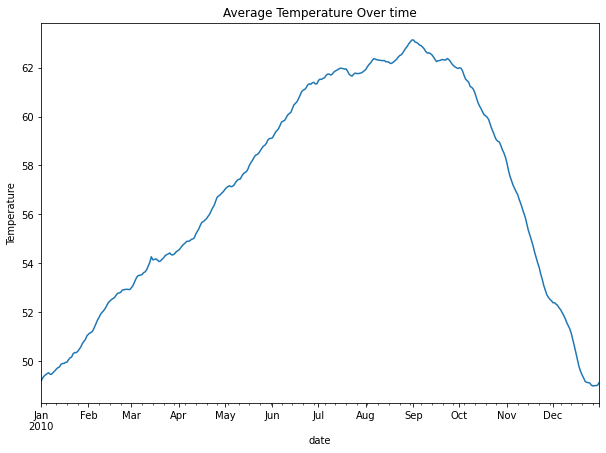

In [8]:
plt.figure(figsize=(10, 7))
plt.title('Average Temperature Over time')
plt.ylabel('Temperature')
df_by_day.plot()

# 2
Write the code necessary to visualize the minimum temperature over time.

In [9]:
df.temp.min()

45.6

In [10]:
# resample data by week and take the mimum temperature over time
min_temp_over_time = df.resample('1w').temp.min()

<AxesSubplot:title={'center':'Minimum Temperature Overtiem by Week'}, xlabel='date', ylabel='Temperature'>

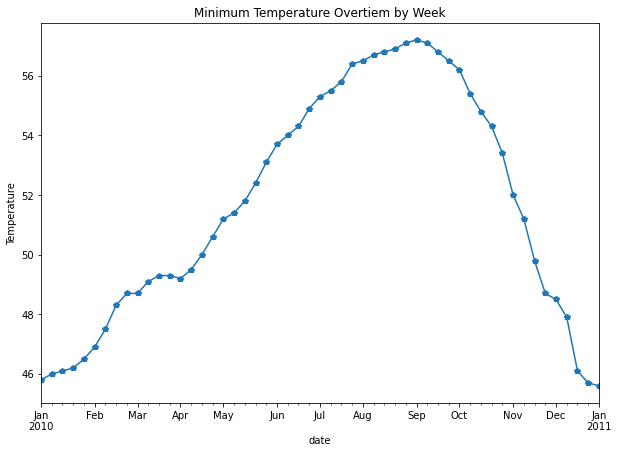

In [11]:
plt.figure(figsize=(10, 7))
plt.title('Minimum Temperature Overtiem by Week')
plt.ylabel('Temperature')
min_temp_over_time.plot(marker='p')

# 3
Write the code necessary to visualize the maximum temperature over time.

In [12]:
# resample data by week and take the maximum temperature over time
max_temp_over_time = df.resample('1w').temp.max()

<AxesSubplot:title={'center':'Maximum Temperature Overtiem by Week'}, xlabel='date', ylabel='Temperature'>

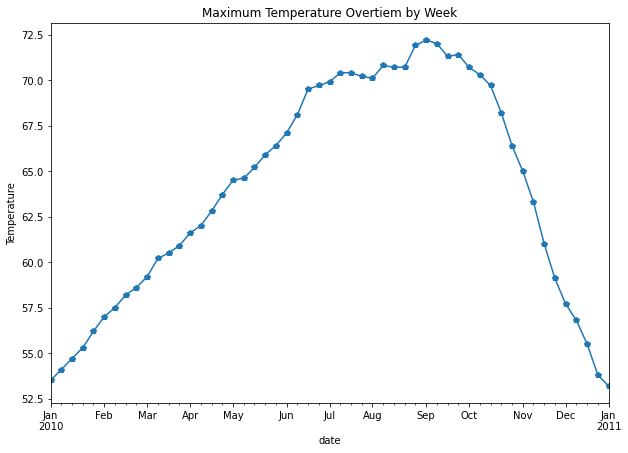

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Maximum Temperature Overtiem by Week')
plt.ylabel('Temperature')
max_temp_over_time.plot(marker='p')

# 4
Which month is the coldest, on average?

In [14]:
# create DF and resample data by month whilke taking the the average temperature for 'temp' values
# Data frame averages temperature by month
data_by_month = df.resample('1m').temp.mean()
type(data_by_month)

pandas.core.series.Series

In [15]:
# convert series into DF 
data_by_month = pd.DataFrame (data_by_month)
data_by_month.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [16]:
# print record with the minimum temperature of the data_by_month DF
print(data_by_month[data_by_month.temp == data_by_month.temp.min()])

                temp
date                
2010-01-31  49.98414


In [17]:
# print the name of the month with average minimum temperature
print(data_by_month[data_by_month.temp == data_by_month.temp.min()].index.month_name())

Index(['January'], dtype='object', name='date')


# 5
Which month has the highest average temperature?


In [18]:
# print record with the maximum temperature of the data_by_month DF
print(data_by_month[data_by_month.temp == data_by_month.temp.max()])

                 temp
date                 
2010-09-30  62.487083


In [19]:
# print the name of the month with the highst average maximum temperature
print(data_by_month[data_by_month.temp == data_by_month.temp.max()].index.month_name())

Index(['September'], dtype='object', name='date')


# 6
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [20]:
# create a min_max DF and resample data by day
min_max_data = df.resample('1d').temp.agg(['min', 'max'])
min_max_data.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [21]:
# Create series with the changes in teperature
temp_change =  min_max_data['max'] - min_max_data['min']

In [22]:
type(temp_change)

pandas.core.series.Series

In [23]:
# turn series to pandas DF
temp_change = pd.DataFrame(temp_change)
# Rename colum 0 to temp_change
temp_change.rename(columns={0: 'temp_change'}, inplace=True)
temp_change.head(10)

,temp_change
date,
2010-01-01,7.5
2010-01-02,7.4
2010-01-03,7.4
2010-01-04,7.5
2010-01-05,7.7
2010-01-06,7.7
2010-01-07,7.8
2010-01-08,7.9
2010-01-09,8.0


In [24]:
min_max_temp_change = min_max_data
# min_max_temp_change = min_max_data['temp_change'] = temp_change.temp_change
min_max_temp_change['temp_change'] = temp_change.temp_change

In [25]:
min_max_temp_change.head(13)

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
2010-01-06,46.1,53.8,7.7
2010-01-07,46.0,53.8,7.8
2010-01-08,46.0,53.9,7.9
2010-01-09,46.0,54.0,8.0


In [26]:
most_variavilty_month = min_max_temp_change.resample('1m').temp_change.sum()

In [27]:
most_variavilty_month.max()

433.3

In [28]:
most_variavilty_month = pd.DataFrame(most_variavilty_month)

In [29]:
# print the 
print(most_variavilty_month[most_variavilty_month.temp_change == most_variavilty_month.temp_change.max()].index.month_name())

Index(['July'], dtype='object', name='date')


# 7 Bonus
Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


-------------------------------------------------
# Seattle Weather

In [30]:
# import seattle_weather as the data frame mine information from
from vega_datasets import data

# know data structure we are working with
type(data.seattle_weather())

pandas.core.frame.DataFrame

In [31]:
# Set proper name for DF
seattle_weather = data.seattle_weather()

# 1 
Which year and month combination has the highest amount of precipitation?
mont?

In [32]:
seattle_weather.sample(2)

,date,precipitation,temp_max,temp_min,wind,weather
793,2014-03-04,16.5,13.9,7.8,3.9,fog
438,2013-03-14,2.8,11.7,9.4,3.0,rain


In [33]:
# st the index of the DF to date 
seattle_weather = seattle_weather.set_index('date').sort_index()
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [34]:
seattle_weather.precipitation.max()

55.9

In [ ]:
print(data_by_month[data_by_month.temp == data_by_month.temp.max()].index.month_name())

In [48]:
print(seattle_weather[seattle_weather.precipitation == seattle_weather.precipitation.max()].index.month_name())

Index(['March'], dtype='object', name='date')


In [ ]:
print(seattle_weather[seattle_weather.precipitation == seattle_weather.precipitation.max()].index.year())

# 2
Visualize the amount of monthly precipitation over time.

# 3
Visualize the amount of wind over time. Choose a time interval you think is appropriate.


# 4
Which year-month combination is the windiest?

# 5
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

# 6
In which month does it rain the most?

# 7
Which month has the most number of days with a non-zero amount of precipitation?

----------------------------------------------------------
# flights_20k Data

# 1
Convert any negative delays to 0.

# 2 
Which hour of the day has the highest average delay?

# 3
Does the day of the week make a difference in the delay amount?

# 4 
Does the month make a difference in the delay amount?